### Урок 7. Многомерный статистический анализ. Линейная регрессия

1. Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [12]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [17]:
zp_x = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks_y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
num = 8
b = (np.mean(zp_x * ks_y) - np.mean(zp_x) * np.mean(ks_y)) / (np.mean(zp_x**2)-np.mean(zp_x)**2)
print(f'{b}')
a = np.mean(ks_y) - b * np.mean(zp_x)
print(f'{a}')
y = a + b * zp_x
print(f'{y}')

2.620538882402765
444.1773573243596
[535.89621821 562.10160703 942.07974498 968.2851338  548.99891262
 627.61507909 585.68645697 837.25818968 758.64202321 732.43663439]


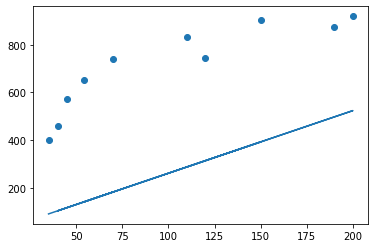

In [31]:
plt.scatter(zp_x, ks_y)
plt.plot(zp_x, y)
plt.show()

In [30]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(ks_y, y, squared=False)
print(rmse)
mean_y = np.mean(y)
print(mean_y)

A_mean = 100 * np.mean(np.abs((ks_y - y ) / ks_y))
A_mean

451.40219202040714
265.7226426756403


65.2875936982184

вариант 2

In [26]:
zp_x = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks_y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
num = 8
b = (np.mean(zp_x * ks_y) - np.mean(zp_x) * np.mean(ks_y)) / (np.mean(zp_x**2)-np.mean(zp_x)**2)
print(f'{b}')
y = b * zp_x
print(f'{y}')

2.620538882402765
[ 91.71886088 117.92424971 497.90238766 524.10777648 104.8215553
 183.43772177 141.50909965 393.08083236 314.46466589 288.25927706]


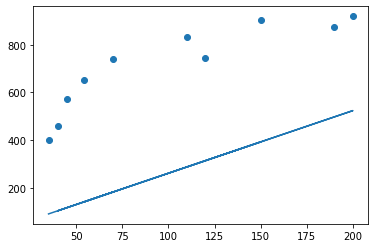

In [27]:
plt.scatter(zp_x, ks_y)
plt.plot(zp_x, y)
plt.show()

2.Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).


In [53]:
zp_x = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks_y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
num = 8
b = (np.mean(zp_x * ks_y) - np.mean(zp_x) * np.mean(ks_y)) / (np.mean(zp_x**2)-np.mean(zp_x)**2)
print(f'{b}')
y = b * zp_x
print(f'{y}')
alpha = 1e-6
z1 = 0.1
def mse_(z1,num = num, ks_y = ks_y, zp_x= zp_x):
    return np.sum((z1*zp_x-ks_y)**2)/num


for i in range(200):
    z1 -= alpha*(2/num)*np.sum((z1*zp_x-ks_y)*zp_x)
    if i%10 ==0:
        print(f'Iteration: {i} z1={z1}, mse={mse_(z1)}')
        

2.620538882402765
[ 91.71886088 117.92424971 497.90238766 524.10777648 104.8215553
 183.43772177 141.50909965 393.08083236 314.46466589 288.25927706]
Iteration: 0 z1=0.2994101, mse=608840.7921023312
Iteration: 10 z1=1.9522385309535615, mse=337646.0719603328
Iteration: 20 z1=3.116401253000165, mse=203105.56566541974
Iteration: 30 z1=3.936374347618984, mse=136359.62081585286
Iteration: 40 z1=4.513918932380086, mse=103246.75929520423
Iteration: 50 z1=4.920710020497358, mse=86819.3703271271
Iteration: 60 z1=5.207231604696927, mse=78669.69385956415
Iteration: 70 z1=5.40904187195766, mse=74626.6151539332
Iteration: 80 z1=5.5511860810427285, mse=72620.83179738057
Iteration: 90 z1=5.651304754144307, mse=71625.75671565623
Iteration: 100 z1=5.72182291853623, mse=71132.09701156412
Iteration: 110 z1=5.771492089682365, mse=70887.19096585951
Iteration: 120 z1=5.806476360524031, mse=70765.69234904819
Iteration: 130 z1=5.831117383880794, mse=70705.41652431471
Iteration: 140 z1=5.848473184572383, mse=7

3. В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, а в каких - таблица критических точек распределения Стьюдента? *4. Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).


При известных дисперсиях вычисление доверительных интервалов осуществляется при помощи функции Лапласа. При неизвестных дисперсиях и ненормальном распределении, используется распределение Стьюдента

